In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp

In [19]:
SiO = pd.read_csv('SiO.csv')
SiN = pd.read_csv('SiN.csv')
SiOfine = pd.read_csv('SiOfine.csv')
SiNfine = pd.read_csv('SiNfine.csv')

Text(0.5, 1.0, 'Sample A')

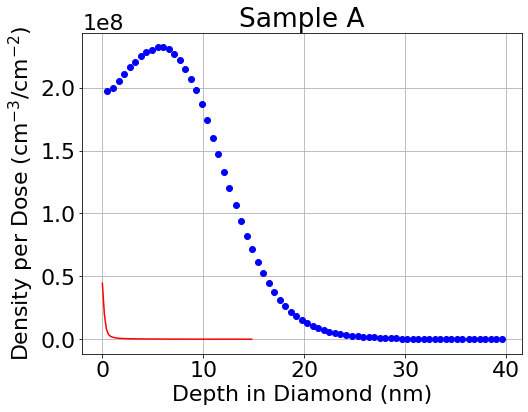

In [20]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density per Dose (cm$^{-3}$/cm$^{-2}$)')
plt.plot(SiO['DEPTH'], SiO['C']*1e8, 'ob',label = 'Vacancy')
plt.plot(SiOfine['DEPTH'], SiOfine['Si'], '-r',label = 'Si Atom')
plt.title('Sample A')
# plt.legend()

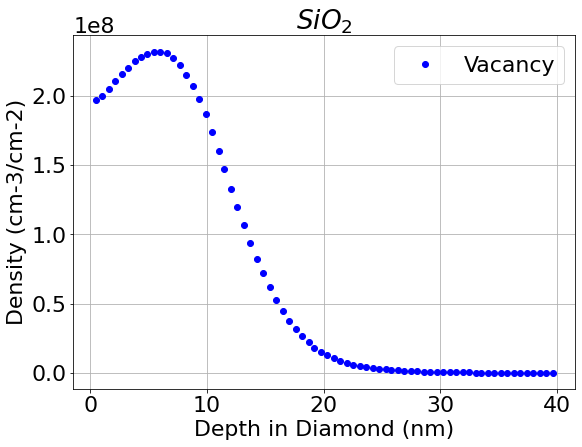

In [21]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density (cm-3/cm-2)')
plt.plot(SiO['DEPTH'], SiO['C']*1e8, 'ob',label = 'Vacancy')
plt.title('$SiO_2$')
plt.legend()

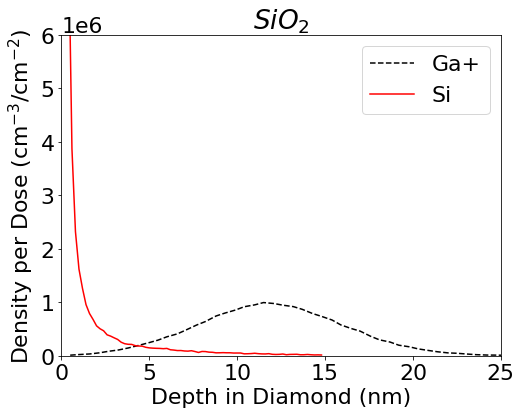

In [22]:
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.rcParams.update({'font.size': 22})
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density per Dose (cm$^{-3}$/cm$^{-2}$)')
plt.plot(SiO['DEPTH'], SiO['Ga'], '--k',label = 'Ga+')
plt.plot(SiOfine['DEPTH'], SiOfine['Si'], '-r',label = 'Si')
plt.xlim([0,25])
plt.ylim([0,0.6e7])
plt.title('$SiO_2$')
plt.legend()

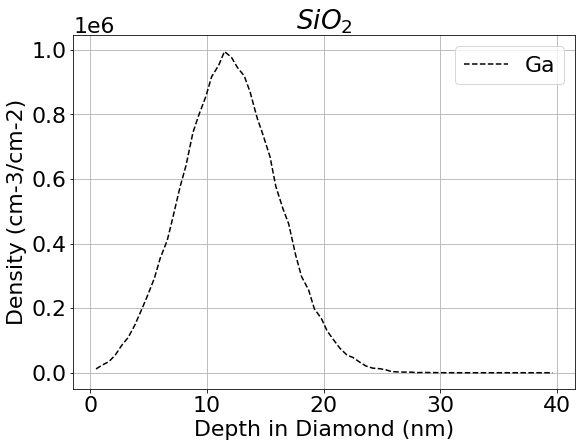

In [23]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density (cm-3/cm-2)')
plt.plot(SiO['DEPTH'], SiO['Ga'], '--k',label = 'Ga')
plt.title('$SiO_2$')
plt.legend()

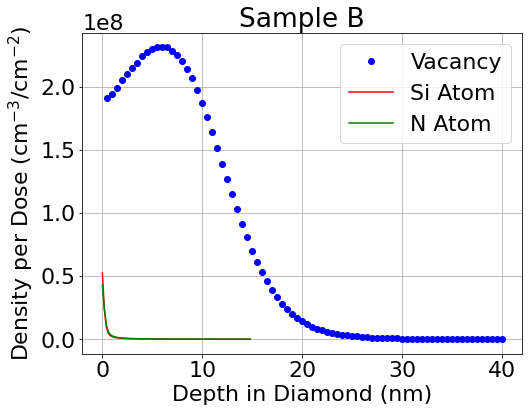

In [24]:

plt.rcParams.update({'font.size': 22})
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density per Dose (cm$^{-3}$/cm$^{-2}$)')
plt.plot(SiN['DEPTH'][1:], SiN['C'][1:]*1e8, 'ob',label = 'Vacancy')
plt.plot(SiNfine['DEPTH'], SiNfine['Si'], '-r',label = 'Si Atom')
plt.plot(SiNfine['DEPTH'], SiNfine['N'], '-g',label = 'N Atom')
plt.title('Sample B')
plt.legend()

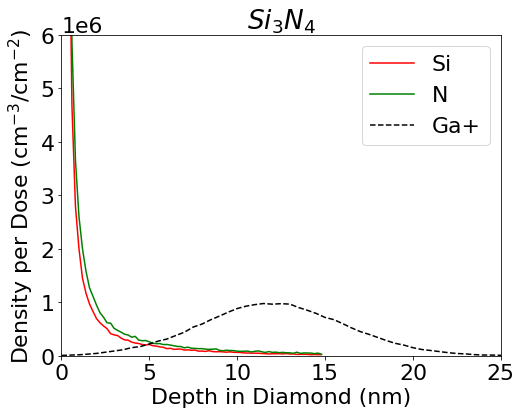

In [25]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density per Dose (cm$^{-3}$/cm$^{-2}$)')

plt.plot(SiNfine['DEPTH'], SiNfine['Si'], '-r',label = 'Si')
plt.plot(SiNfine['DEPTH'], SiNfine['N'], '-g',label = 'N')
plt.plot(SiN['DEPTH'], SiN['Ga'], '--k',label = 'Ga+')
plt.xlim([0,25])
plt.ylim([0,0.6e7])
plt.title('$Si_3N_4$')
plt.legend()

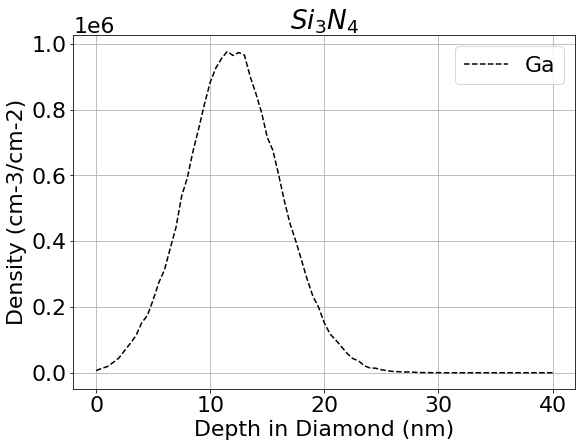

In [26]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Density (cm-3/cm-2)')
plt.plot(SiN['DEPTH'], SiN['Ga'], '--k',label = 'Ga')
plt.title('$Si_3N_4$')
plt.legend()

In [27]:
def integrate(x, y):
    sum = 0
    for i in range(len(x)-1):
        # print(sum*1e-7)
        sum += y[i]*(x[i+1]-x[i])
        
    return sum

# unit is cm^-2 / cm^-2

In [28]:
integrate(np.array(SiOfine['DEPTH']), np.array(SiOfine['Si']))*1e-7

1.82666

In [29]:
integrate(np.array(SiNfine['DEPTH']), np.array(SiNfine['Si']))*1e-7

2.17948

In [30]:
integrate(np.array(SiNfine['DEPTH']), np.array(SiNfine['N']))*1e-7

2.18792

In [31]:
def cumulative_integral(x, y):
    """
    Calculate cumulative integral of the given function using the trapezoidal rule.

    Parameters:
    - x: Array of x-values
    - y: Array of y-values (function values)

    Returns:
    - Array of cumulative integrals up to each index
    """
    n = len(x)
    result = [0]  # The initial integral at index 0 is 0

    for i in range(1,n):
        # Trapezoidal rule formula for numerical integration
        integral_segment = (x[i] - x[i - 1]) * y[i-1]*1e-7
        cumulative_integral_value = result[-1] + integral_segment
        # print(result[-1])
        result.append(cumulative_integral_value)

    return result

# calling the function gives nm/cm

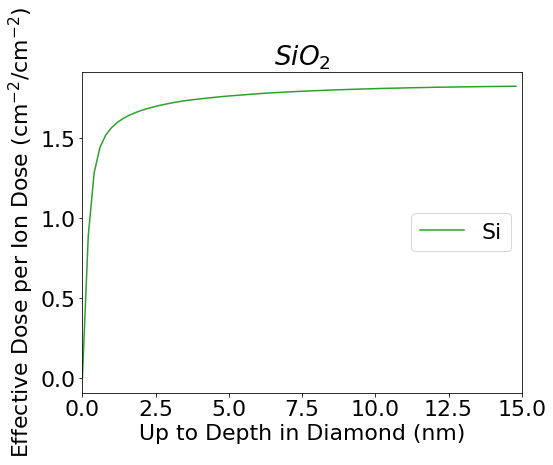

In [32]:
cumulative_si_sio2 = cumulative_integral(np.array(SiOfine['DEPTH']), np.array(SiOfine['Si']))
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.rcParams.update({'font.size': 22})
plt.xlabel(r'Up to Depth in Diamond (nm)')
plt.ylabel(r'Effective Dose per Ion Dose (cm$^{-2}$/cm$^{-2}$)')
plt.plot(SiOfine['DEPTH'], cumulative_si_sio2, '-C2',label = 'Si')
plt.xlim([0,15])
# plt.ylim([0,0.6e7])
plt.title('$SiO_2$')
plt.legend(loc = 'center right')

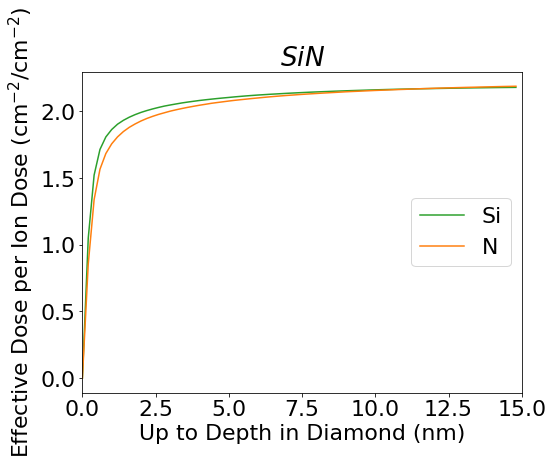

In [33]:
cumulative_si_sin = cumulative_integral(np.array(SiNfine['DEPTH']), np.array(SiNfine['Si']))
cumulative_n_sin = cumulative_integral(np.array(SiNfine['DEPTH']), np.array(SiNfine['N']))
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.rcParams.update({'font.size': 22})
plt.xlabel(r'Up to Depth in Diamond (nm)')
plt.ylabel(r'Effective Dose per Ion Dose (cm$^{-2}$/cm$^{-2}$)')
plt.plot(SiNfine['DEPTH'], cumulative_si_sin, '-C2',label = 'Si')
plt.plot(SiNfine['DEPTH'], cumulative_n_sin, '-C1',label = 'N')
plt.xlim([0,15])
# plt.ylim([0,0.6e7])
plt.title('$SiN$')
plt.legend(loc = 'center right')

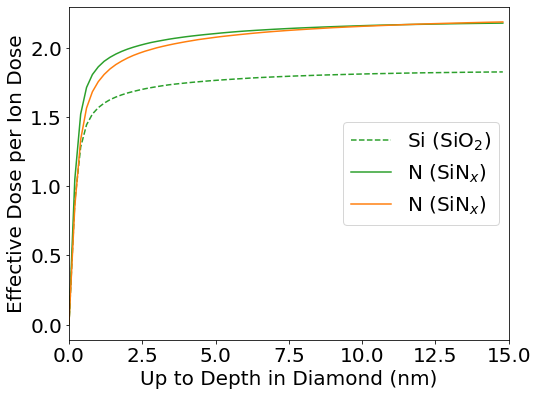

In [36]:
cumulative_si_sio2 = cumulative_integral(np.array(SiOfine['DEPTH']), np.array(SiOfine['Si']))
cumulative_si_sin = cumulative_integral(np.array(SiNfine['DEPTH']), np.array(SiNfine['Si']))
cumulative_n_sin = cumulative_integral(np.array(SiNfine['DEPTH']), np.array(SiNfine['N']))
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.rcParams.update({'font.size': 20})
plt.xlabel(r'Up to Depth in Diamond (nm)')
plt.ylabel(r'Effective Dose per Ion Dose')
plt.plot(SiNfine['DEPTH'], cumulative_si_sio2, '--C2',label = 'Si (SiO$_2$)')
plt.plot(SiNfine['DEPTH'], cumulative_si_sin, '-C2',label = 'N (SiN$_x$)')
plt.plot(SiNfine['DEPTH'], cumulative_n_sin, '-C1',label = 'N (SiN$_x$)')
plt.xlim([0,15])
# plt.ylim([0,0.6e7])
# plt.title('$SiN$')
plt.legend(loc = 'center right')
plt.tight_layout()
plt.savefig('cumulative density.pdf', format= 'pdf',transparent=False)